# Machine Learning and Model Refinement

### Unscaled Linear Regression Model

In [5]:
#using the reg_mode.py file to run a linear regression model in the "terminal" 
!python reg_model.py

Model Performance:
MAE: 0.5332001304956562
RMSE: 0.7455813830127761
Model saved as house_price_model.pkl


In [6]:
#Import relevant libraries 
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
df= pd.read_csv("cali_housing_data.csv") 

In [7]:
#Re-run linear regression as an unscaled model 
X = df.drop(columns=["Price"]) 
y = df["Price"]

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaled features

# Train the model on unscaled features
unscaled_model = LinearRegression()
unscaled_model.fit(X, y)

#Run Prediction 
df["Predicted_Price"] = unscaled_model.predict(X)

### Prediction Accuracy and Visualization

In [8]:
#Compute Prediction Accuracy 
y_actual = df["Price"].values
y_predicted = df["Predicted_Price"].values

# Compute metrics
mae = mean_absolute_error(y_actual, y_predicted)
rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
r2 = r2_score(y_actual, y_predicted)

# Print results
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.72
R-squared (R²): 0.6062


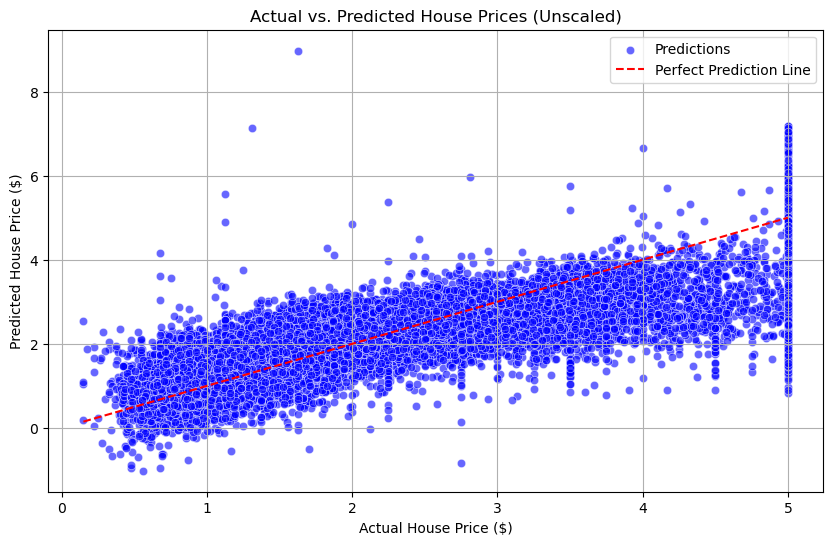

In [9]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
# Scatter plot of predictions
sns.scatterplot(x=y_actual, y=y_predicted, alpha=0.6, color="blue", label="Predictions")
# Perfect prediction line
plt.plot([y_actual.min(), y_actual.max()], 
         [y_actual.min(), y_actual.max()], 
         color='red', linestyle='dashed', label="Perfect Prediction Line")

plt.xlabel("Actual House Price ($)")
plt.ylabel("Predicted House Price ($)")
plt.title("Actual vs. Predicted House Prices (Unscaled)")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
#Visulaization based on error percentage 
#Adjust scaled values 
actual_prices = df["Price"] * 1000  
predicted_prices = df["Predicted_Price"]
# Calculate percentage error
df["Error_Percentage"] = abs((df["Predicted_Price"] - df["Price"]) / df["Price"]) * 100
# Define bins and labels for accuracy grouping
bins = [0, 10, 20, 30, 50, 100, float("inf")]
labels = ["Exact (0-10%)", "Close (10-20%)", "Moderate (20-30%)", "Off (30-50%)", "High Error (50-100%)", "Very High Error (>100%)"]
df["Error_Group"] = pd.cut(df["Error_Percentage"], bins=bins, labels=labels, right=False)

# Count the number of predictions in each group
error_summary = df["Error_Group"].value_counts().sort_index()

In [11]:
# Display the table
print(error_summary)

Error_Group
Exact (0-10%)              4911
Close (10-20%)             4237
Moderate (20-30%)          3398
Off (30-50%)               4297
High Error (50-100%)       3091
Very High Error (>100%)     706
Name: count, dtype: int64


C:\Users\Cori\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


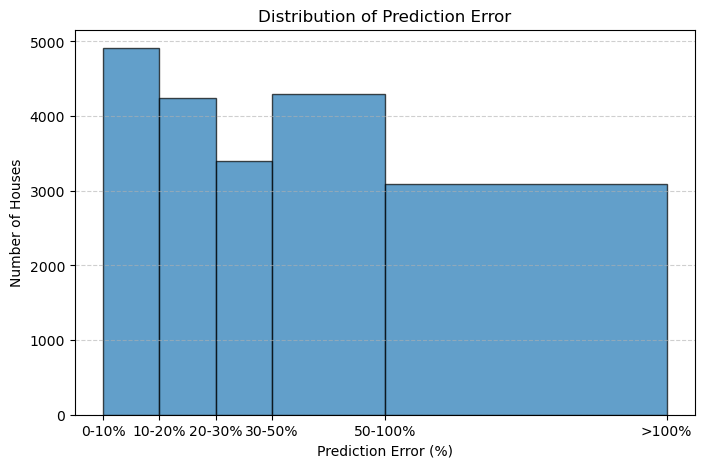

In [12]:
#Histogram plot 
plt.figure(figsize=(8,5))
plt.hist(df["Error_Percentage"], bins=bins, edgecolor="black", alpha=0.7)

plt.xlabel("Prediction Error (%)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Prediction Error")
plt.xticks([0, 10, 20, 30, 50, 100], labels=["0-10%", "10-20%", "20-30%", "30-50%", "50-100%", ">100%"])
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

### Model Refinements: Scale Targets

In [13]:
#Scaling model to decrease margin of error 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define features (X) and target variable (y)
X = df.drop(columns=["Price", "Error_Group"])
y = df["Price"]  # Target variable

# Apply standard scaling to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transformed features

# Train a linear regression model on the scaled features
scaled_model = LinearRegression()
scaled_model.fit(X_scaled, y)  # Fit model on scaled data

# Predict house prices using the scaled model
y_pred_scaled = scaled_model.predict(X_scaled)

# Store predictions in the DataFrame for later analysis
df["Predicted_Price_Scaled"] = y_pred_scaled

In [14]:
# Compute metrics
mae = mean_absolute_error(y_actual, y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred_scaled))
r2 = r2_score(y_actual, y_pred_scaled)

# Print results
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.51
Root Mean Squared Error (RMSE): 0.70
R-squared (R²) Score: 0.6285


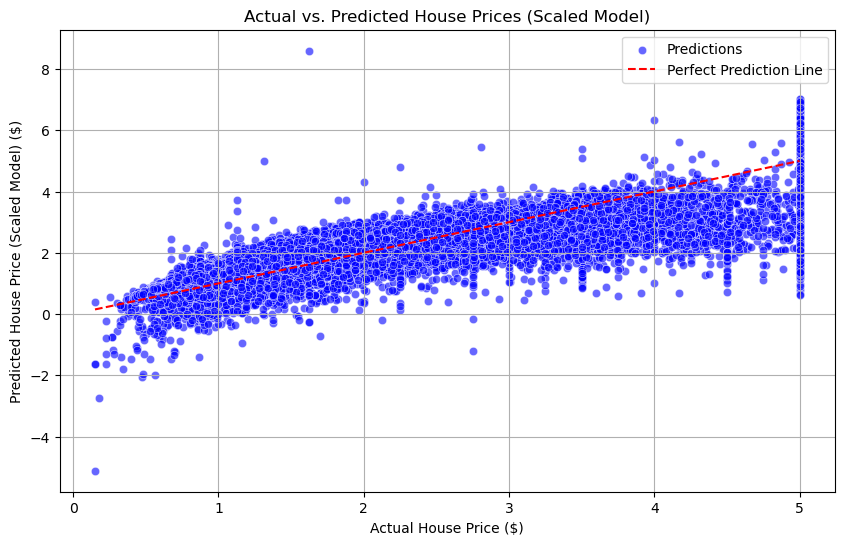

In [15]:
#Updated Actual vs. Predicted Feature Scaled Scatterplot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price"], y=df["Predicted_Price_Scaled"], alpha=0.6, color="blue", label="Predictions")
plt.plot([df["Price"].min(), df["Price"].max()], 
         [df["Price"].min(), df["Price"].max()], 
         color='red', linestyle='dashed', label="Perfect Prediction Line")

plt.xlabel("Actual House Price ($)")
plt.ylabel("Predicted House Price (Scaled Model) ($)")
plt.title("Actual vs. Predicted House Prices (Scaled Model)")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Error Distribution Tablw 
# Compute the error percentage
df["Error_Percentage_Scaled"] = abs(df["Predicted_Price_Scaled"] - df["Price"]) / df["Price"] * 100

# Define error bins
bins = [0, 10, 20, 30, 50, 100, float("inf")]
labels = ["Exact (0-10%)", "Close (10-20%)", "Moderate (20-30%)", "Off (30-50%)", "High Error (50-100%)", "Very High Error (>100%)"]

# Categorize errors into bins
df["Error_Group_Scaled"] = pd.cut(df["Error_Percentage_Scaled"], bins=bins, labels=labels, right=False)

# Count occurrences in each bin
error_distribution_scaled = df["Error_Group_Scaled"].value_counts().sort_index()

# Display table
print(error_distribution_scaled)

Error_Group_Scaled
Exact (0-10%)              4013
Close (10-20%)             4271
Moderate (20-30%)          3829
Off (30-50%)               5945
High Error (50-100%)       2405
Very High Error (>100%)     177
Name: count, dtype: int64


C:\Users\Cori\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


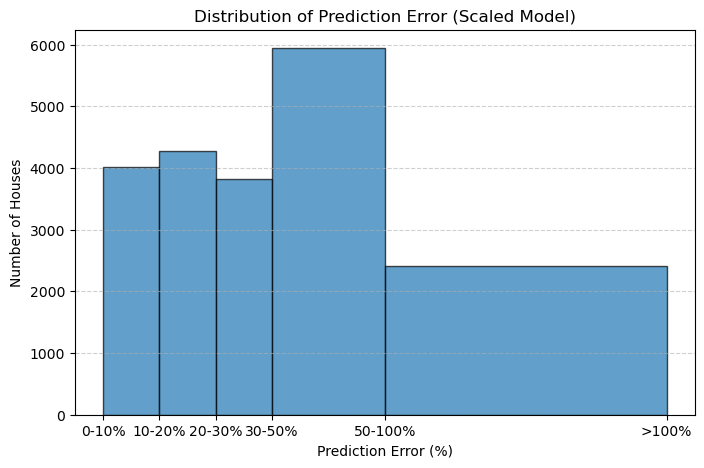

In [17]:
#Scaled Model Histogram 
plt.figure(figsize=(8, 5))
plt.hist(df["Error_Percentage_Scaled"], bins=bins, edgecolor="black", alpha=0.7)

plt.xlabel("Prediction Error (%)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Prediction Error (Scaled Model)")
plt.xticks([0, 10, 20, 30, 50, 100], labels=["0-10%", "10-20%", "20-30%", "30-50%", "50-100%", ">100%"])
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

### Model Refinements: Outlier Removal and Ridge Regression

In [18]:
# Remove outliers
threshold = 20
df_cleaned = df[df["Error_Percentage"] <= threshold].copy()  # Use .copy() to avoid chained assignment issues

# Now drop the unwanted columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=["Error_Group", "Error_Group_Scaled"])

# Define cleaned feature set
X_cleaned = df_cleaned.drop(columns=["Price"])  
y_cleaned = df_cleaned["Price"]

In [19]:
from sklearn.linear_model import Ridge
# Apply standard scaling to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)
# Train a Ridge Regression model on the scaled features
ridge_model = Ridge(alpha=5.0)
ridge_model.fit(X_scaled, y_cleaned)

# Predict house prices using the Ridge model
y_pred_ridge = ridge_model.predict(X_scaled)

# Store predictions in DataFrame
df_cleaned["Predicted_Price_Scaled"] = y_pred_ridge

In [20]:
#Metric Check 
mae = mean_absolute_error(y_cleaned, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_cleaned, y_pred_ridge))
r2 = r2_score(y_cleaned, y_pred_ridge)

# Display updated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.19
Root Mean Squared Error (RMSE): 0.26
R-squared (R²) Score: 0.9318


In [21]:
#Cross validation to detect overfitting 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge_model, X_cleaned, y_cleaned, cv=5, scoring="r2")
print(f"Cross-validated R² scores: {scores.mean():.4f}")

Cross-validated R² scores: 0.9261


In [22]:
# Compute error percentage
df_cleaned["Error_Percentage"] = abs(df_cleaned["Price"] - df_cleaned["Predicted_Price_Scaled"]) / df_cleaned["Price"] * 100

# Define bins for error percentage groups
bins = [0, 2, 5, 10, 20, 50, 100]  # Adjust if needed
labels = ["0-2%", "2-5%", "5-10%", "10-20%", "20-50%", "50%+"]

# Create error groups
df_cleaned["Error_Group"] = pd.cut(df_cleaned["Error_Percentage"], bins=bins, labels=labels, include_lowest=True)

# Count number of predictions in each error group
error_table = df_cleaned["Error_Group"].value_counts().sort_index()

# Display error table
print(error_table)

Error_Group
0-2%      1996
2-5%      1694
5-10%     2131
10-20%    2813
20-50%     430
50%+        78
Name: count, dtype: int64


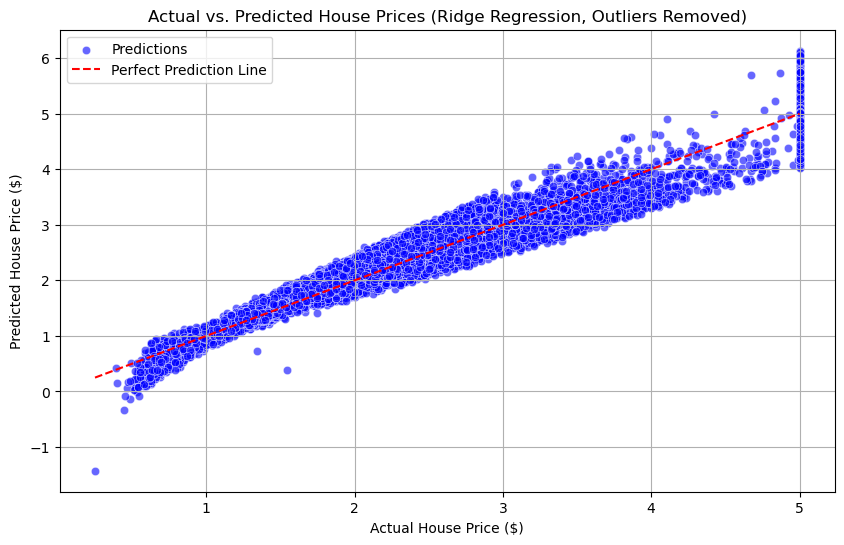

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["Price"], y=df_cleaned["Predicted_Price_Scaled"], alpha=0.6, color="blue", label="Predictions")

# Perfect prediction reference line
plt.plot([df_cleaned["Price"].min(), df_cleaned["Price"].max()], 
         [df_cleaned["Price"].min(), df_cleaned["Price"].max()], 
         color='red', linestyle='dashed', label="Perfect Prediction Line")

plt.xlabel("Actual House Price ($)")
plt.ylabel("Predicted House Price ($)")
plt.title("Actual vs. Predicted House Prices (Ridge Regression, Outliers Removed)")
plt.legend()
plt.grid(True)
plt.show()